# BITS F464 : Machine Learning Assignment 3 

Adit Rastogi <br>
2022A7PS1330H <br><br>
Deeptansh Gupta <br>
2022A7PS1336H <br><br>
Anirban Nayak <br>
2022A3PS0705H <br>

## Task 1 Data Loading and Prepration

### Importing the necessary libraries

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("./Admission_Predict_A3.csv")
print(data.head())

   Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0           1        337          118                  4  4.5   4.5  9.65   
1           2        324          107                  4  4.0   4.5  8.87   
2           3        316          104                  3  3.0   3.5  8.00   
3           4        322          110                  3  3.5   2.5  8.67   
4           5        314          103                  2  2.0   3.0  8.21   

   Research  Chance of Admit   
0         1              0.92  
1         1              0.76  
2         1              0.72  
3         1              0.80  
4         0              0.65  


### Loading the CSV file into pandas DataFrame

In [3]:
df = pd.DataFrame(data)

### Analyzing the data and handling the missing values

In [4]:
describe_df = df.describe()

median = df.median(numeric_only=True)
std_dev = df.std(numeric_only=True)
describe_df.loc['median'] = median
describe_df.loc['std'] = std_dev
describe_df = describe_df.drop(['25%', '50%', '75%'])
describe_df = describe_df.loc[['count', 'mean', 'median', 'std', 'min', 'max']]
styled_summary = (describe_df.style
                  .format("{:.2f}")  # Format numbers to 2 decimal places
                  .background_gradient(cmap='coolwarm')  # Add color gradient
                  .set_table_styles([{'selector': 'thead th', 'props': [('background-color', '#404040'), ('color', 'white')]}])  # Style headers
                  )
display(styled_summary)

In [5]:
missing_values_per_column = df.isnull().sum()
columns_with_missing_values = missing_values_per_column[missing_values_per_column > 0]
print("Columns with missing values:\n", columns_with_missing_values)

Columns with missing values:
 Series([], dtype: int64)


no column has missing values

#### Analyzing the Correlation Matrix

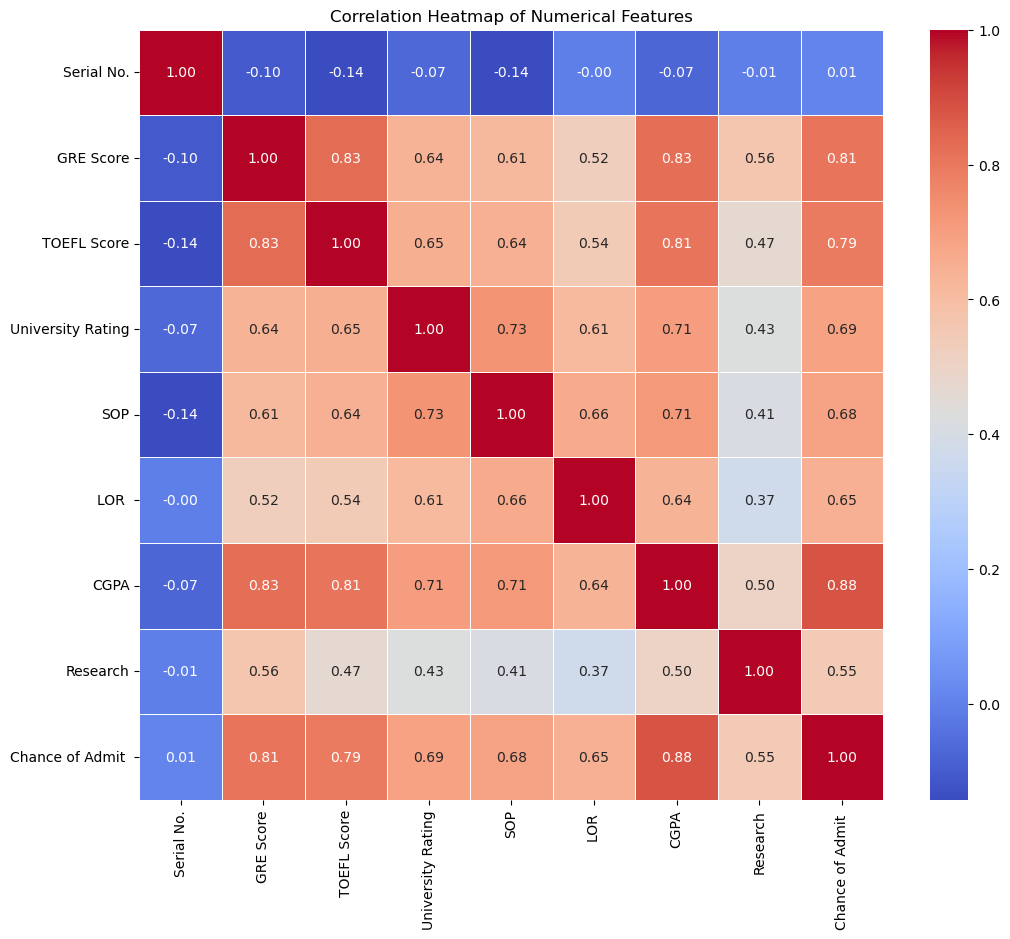

In [6]:
corr_matrix = df.corr()

# Plotting the HeatMap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

This correlation heatmap provides valuable insights into which features are most strongly related to admission chances, helping in feature selection and prioritization during model building.

### Observations for correlation matrix

- CGPA (0.88): The CGPA feature has the strongest positive correlation with the "Chance of Admit." This suggests that students with higher CGPA scores are more likely to have a higher chance of admission.
- GRE Score (0.81): GRE Score also has a strong positive correlation with "Chance of Admit." Students with higher GRE scores tend to have better chances of admission.
- TOEFL Score (0.79): TOEFL score is similarly highly correlated with the admission chance, showing that better TOEFL results improve admission chances.
- University Rating (0.69), SOP (0.68), and LOR (0.65): These features have moderate to high correlations with the chance of admission. Higher ratings in these areas also positively impact admission chances.
<br>
<br>
- GRE Score and CGPA (0.83): There is a strong correlation between GRE score and CGPA, indicating that students with higher GRE scores tend to have better CGPAs as well.
- GRE Score and TOEFL Score (0.83): A strong correlation exists between GRE and TOEFL scores, suggesting that students who score well in one standardized test tend to perform well in the other.
- CGPA and TOEFL Score (0.81): A high correlation between CGPA and TOEFL scores also exists, showing that students with higher GPAs tend to have better TOEFL scores.

#### Handling Outliers

In [7]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

# Identify outliers (values outside 1.5 * IQR)
outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR)))
print(outliers.sum())  # Check how many outliers per column

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  1
CGPA                 0
Research             0
Chance of Admit      2
dtype: int64


As we can see very less outliers so our best approach would be just to drop them

In [8]:
cleaned_data = data.copy()

# Remove outliers
for column in cleaned_data.columns:
    if column != 'Serial No.':
        cleaned_data = cleaned_data[~((cleaned_data[column] < (Q1[column] - 1.5 * IQR[column])) |
                                       (cleaned_data[column] > (Q3[column] + 1.5 * IQR[column])))]

# Check the shape of the cleaned data
print("Original data shape:", data.shape)
print("Cleaned data shape:", cleaned_data.shape)

Original data shape: (500, 9)
Cleaned data shape: (497, 9)


## Task 2 Data Scaling

### Applying appropriate Scaling Technique

#### Plotting Histogram for each feature to analyze the distribution of features

Serial No.
GRE Score
TOEFL Score
University Rating
SOP
LOR 
CGPA
Research
Chance of Admit 


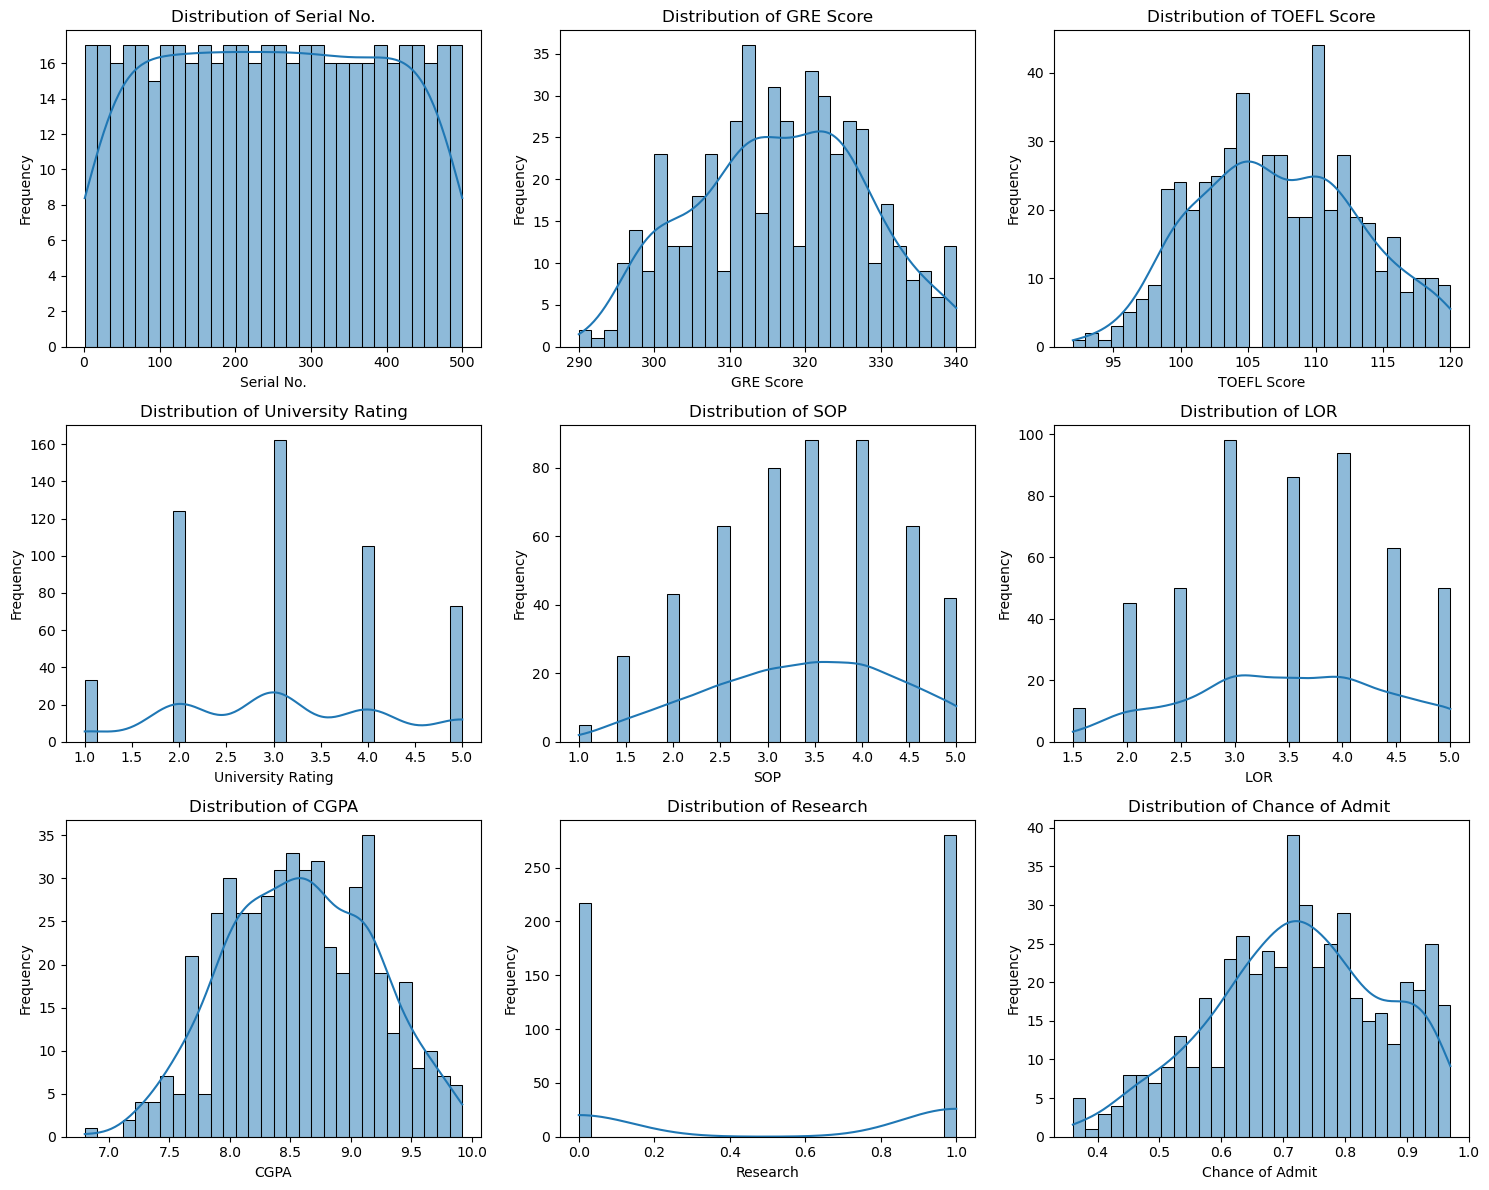

In [9]:
plt.figure(figsize=(15, 12))
for i, column in enumerate(cleaned_data.columns):
    plt.subplot(3, 3, i + 1)
    sns.histplot(cleaned_data[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    print(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

StandardScaler is the recommended scaling method for most of our features as they appear to be approximately normally distributed, making StandardScaler ideal since it standardizes to a mean of 0 and a standard deviation of 1.

#### Applying Standard Scaler

In [10]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

X = cleaned_data.drop(columns=['Serial No.'])
y = cleaned_data['Chance of Admit ']

scaler = StandardScaler()

X_numerical = X.drop(columns=['Chance of Admit ', 'Research'])
X_scaled = scaler.fit_transform(X_numerical)

X_scaled_df = pd.DataFrame(X_scaled, columns=X_numerical.columns)


X_scaled_df['Chance of Admit'] = X['Chance of Admit '].values
X_scaled_df['Research'] = X['Research'].values

print(X_scaled_df.head())


   GRE Score  TOEFL Score  University Rating       SOP      LOR       CGPA  \
0   1.818719     1.781161           0.769761  1.136549  1.097138  1.777188   
1   0.660668    -0.043044           0.769761  0.629489  1.097138  0.478836   
2  -0.051979    -0.540555          -0.107696 -0.384631  0.007672 -0.969326   
3   0.482506     0.454466          -0.107696  0.122429 -1.081793  0.145925   
4  -0.230140    -0.706391          -0.985153 -1.398751 -0.537061 -0.619770   

   Chance of Admit  Research  
0             0.92         1  
1             0.76         1  
2             0.72         1  
3             0.80         1  
4             0.65         0  


## Task 3 Dimensionality Reduction with LDA

### Discretizing "Chance of Admit" using binning technique

In [11]:
bins = [0.3, 0.5, 0.7, 1.0]  # Define the bins
labels = ['low', 'medium', 'high']  # Define the labels for each bin

# Create the new category column based on the original "Chance of Admit"
X_scaled_df['Admit Category'] = pd.cut(X_scaled_df['Chance of Admit'], bins=bins, labels=labels)


print(X_scaled_df.head())

   GRE Score  TOEFL Score  University Rating       SOP      LOR       CGPA  \
0   1.818719     1.781161           0.769761  1.136549  1.097138  1.777188   
1   0.660668    -0.043044           0.769761  0.629489  1.097138  0.478836   
2  -0.051979    -0.540555          -0.107696 -0.384631  0.007672 -0.969326   
3   0.482506     0.454466          -0.107696  0.122429 -1.081793  0.145925   
4  -0.230140    -0.706391          -0.985153 -1.398751 -0.537061 -0.619770   

   Chance of Admit  Research Admit Category  
0             0.92         1           high  
1             0.76         1           high  
2             0.72         1           high  
3             0.80         1           high  
4             0.65         0         medium  


### Applying LDA

In [12]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

X = X_scaled_df.drop(columns=['Chance of Admit', 'Admit Category'])
y = X_scaled_df['Admit Category']

lda = LDA()
lda.fit(X, y)

X_lda = lda.transform(X)

num_classes = len(y.unique())

column_names = [f'LD{i+1}' for i in range(num_classes - 1)]  # Generate names LD1, LD2, ...

X_lda_df = pd.DataFrame(X_lda, columns=column_names)

# Display the result
print(X_lda_df.head())

        LD1       LD2
0 -2.737006  0.620835
1 -1.176971 -0.503039
2  0.565854 -1.483682
3 -0.223529 -1.011302
4  1.067244  1.077031


LDA produces C-1 dimensions, where C is the number of classes in the target variable. This means if we have three categories (e.g., low, medium, high), LDA will produce 2 components (LD1 and LD2). Therefore, we have to retain both components because they are essential for maximizing class separability.

#### **The Influence of Dimensionality Reduction**
1. Dimensionality reduction often leads to improved performance in classification tasks, as it reduces noise and overfitting. By retaining only the most informative features, the model can generalize better on unseen data.
2. Fewer dimensions result in faster computations, making the model training and prediction process more efficient, especially with large datasets.
With fewer dimensions, the model becomes easier to interpret.
3. Each linear discriminant can be analyzed to understand which features contribute most to class separation.

## Task 4 Linear Regression on LDA Transformed Data:

### Tensor Flow

Epoch 0: Loss = 1.5373796224594116
Epoch 100: Loss = 0.022525513544678688
Epoch 200: Loss = 0.0038683884777128696
Epoch 300: Loss = 0.003558855038136244
Epoch 400: Loss = 0.003553701564669609
Epoch 500: Loss = 0.003553615650162101
Epoch 600: Loss = 0.003553614253178239
Epoch 700: Loss = 0.0035536144860088825
Epoch 800: Loss = 0.003553614020347595
Epoch 900: Loss = 0.003553614253178239


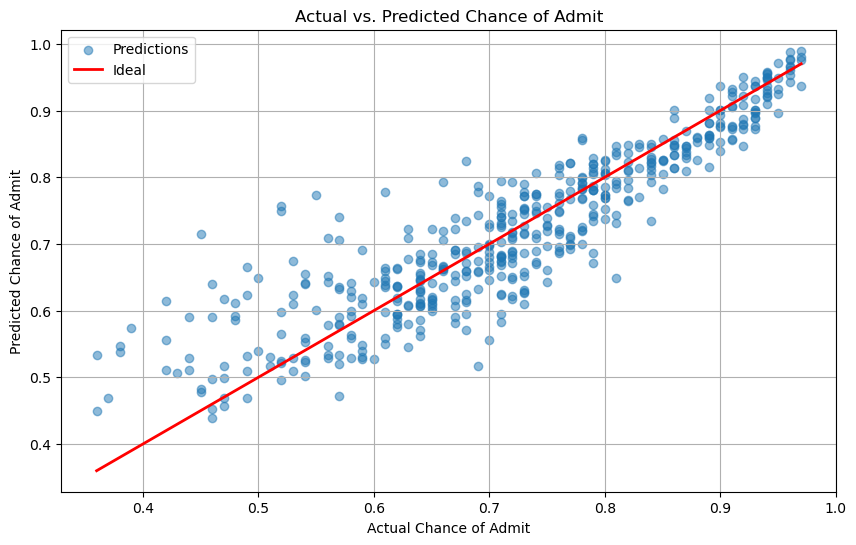

In [13]:
y = X_scaled_df['Chance of Admit']  # Continuous values for regression
X_lda_tensor = tf.convert_to_tensor(X_lda, dtype=tf.float32)
y_tensor = tf.convert_to_tensor(y.values.reshape(-1,1), dtype=tf.float32)

tf.random.set_seed(42)

# Initialize weights and biases
n_features = X_lda.shape[1]
weights = tf.Variable(tf.random.normal([n_features, 1]), name='weights')
bias = tf.Variable(tf.random.normal([1]), name='bias')

# Linear regression model
def linear_regression(X):
    return tf.matmul(X, weights) + bias

def mean_squared_error(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_true - y_pred))

learning_rate = 0.01
optimizer = tf.optimizers.SGD(learning_rate)

# Number of epochs
num_epochs = 1000

# Training loop
for epoch in range(num_epochs):
    with tf.GradientTape() as tape:
        y_pred = linear_regression(X_lda_tensor)  
        loss = mean_squared_error(y_tensor, y_pred)

    gradients = tape.gradient(loss, [weights, bias])

    optimizer.apply_gradients(zip(gradients, [weights, bias]))

    if epoch % 100 == 0:
        print(f'Epoch {epoch}: Loss = {loss.numpy()}')

# Final predictions after training
y_pred = linear_regression(X_lda_tensor)

# Visualizing the actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_tensor.numpy(), y_pred.numpy(), alpha=0.5, label='Predictions')
plt.plot([min(y_tensor), max(y_tensor)], [min(y_tensor), max(y_tensor)], color='red', lw=2, label='Ideal')  # Diagonal line
plt.title('Actual vs. Predicted Chance of Admit')
plt.xlabel('Actual Chance of Admit')
plt.ylabel('Predicted Chance of Admit')
plt.legend()
plt.grid()
plt.show()

### Skikit-Learn

R² Score: 0.82


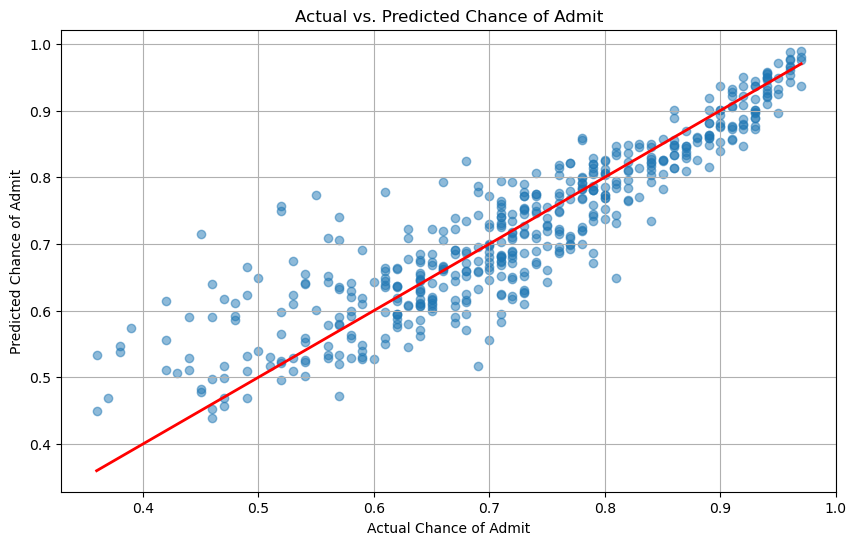

In [14]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_lda_df, y)


y_pred = model.predict(X_lda_df)

r_squared = model.score(X_lda_df, y)
print(f'R² Score: {r_squared:.2f}')

plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred, alpha=0.5)
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', lw=2)  # Diagonal line
plt.title('Actual vs. Predicted Chance of Admit')
plt.xlabel('Actual Chance of Admit')
plt.ylabel('Predicted Chance of Admit')
plt.grid()
plt.show()

In [15]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import random

tf.random.set_seed(42)
np.random.seed(42)
random.seed(42)

X = X_scaled_df[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA']]
y = X_scaled_df['Admit Category']

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)


y_train_categorical = tf.keras.utils.to_categorical(y_train, num_classes=3)  
y_test_categorical = tf.keras.utils.to_categorical(y_test, num_classes=3)

def build_model(learning_rate):
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(X_train.shape[1],)),
        tf.keras.layers.Dense(3, activation='softmax') 
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model


learning_rates = [0.05, 0.075, 0.15, 0.1, 0.01, 0.001, 0.0001]
histories = {}
accuracy_scores = []

for lr in learning_rates:
    print(f"\nTraining model with learning rate: {lr}")
    
  
    model = build_model(learning_rate=lr)
    history = model.fit(X_train, y_train_categorical, epochs=50, validation_data=(X_test, y_test_categorical), batch_size=32, verbose=0)

    histories[lr] = history

    test_loss, test_accuracy = model.evaluate(X_test, y_test_categorical, verbose=0)
    accuracy_scores.append(test_accuracy)
    print(f"Test Accuracy with lr={lr}: {test_accuracy:.4f}")


Training model with learning rate: 0.05
Test Accuracy with lr=0.05: 0.8400

Training model with learning rate: 0.075
Test Accuracy with lr=0.075: 0.8300

Training model with learning rate: 0.15
Test Accuracy with lr=0.15: 0.8500

Training model with learning rate: 0.1
Test Accuracy with lr=0.1: 0.8200

Training model with learning rate: 0.01
Test Accuracy with lr=0.01: 0.8300

Training model with learning rate: 0.001
Test Accuracy with lr=0.001: 0.7400

Training model with learning rate: 0.0001
Test Accuracy with lr=0.0001: 0.3800


- Learning Rate = 0.15 produced the best accuracy at 85%, making it the optimal learning rate from the values you tested.
- The learning rates between 0.05 and 0.15 provide the best results, with accuracies ranging from 82.00% to 85.00%. This suggests that moderate learning rates are the most effective for this model.
- The other learning rates (0.05, 0.075, 0.1, 0.01 etc.) showed slightly lower performance, with the accuracy decreasing as the learning rate became slower.
- Lower learning rates like 0.001 and 0.0001 result in slower convergence, as seen from their lower final accuracy (75% and 42%). The model fails to reach the optimal solution in a reasonable number of epochs.

## Task 5 Logistic Regression 

In [16]:
bin_edges = [0.3, 0.5, 0.7, 1.0]
bin_labels = ['Low', 'Medium', 'High']
data['Admit Category'] = pd.cut(data['Chance of Admit '], bins=bin_edges, labels=bin_labels, include_lowest=True)

In [17]:
print(data.head());

   Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0           1        337          118                  4  4.5   4.5  9.65   
1           2        324          107                  4  4.0   4.5  8.87   
2           3        316          104                  3  3.0   3.5  8.00   
3           4        322          110                  3  3.5   2.5  8.67   
4           5        314          103                  2  2.0   3.0  8.21   

   Research  Chance of Admit  Admit Category  
0         1              0.92           High  
1         1              0.76           High  
2         1              0.72           High  
3         1              0.80           High  
4         0              0.65         Medium  


In [18]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import random


np.random.seed(42)
tf.random.set_seed(42)
random.seed(42)

label_encoder = LabelEncoder()
data['Admit Category'] = label_encoder.fit_transform(data['Admit Category'])


X = data[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research']].values
y = data['Admit Category'].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(shape=(X_train.shape[1],)),  
    tf.keras.layers.Dense(3, activation='softmax')  
])


model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])


history = model.fit(X_train, y_train, epochs=1000, batch_size=32, validation_data=(X_test, y_test))


test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_accuracy * 100:.2f}%')


y_pred = np.argmax(model.predict(X_test), axis=1)


Epoch 1/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6200 - loss: 109.3916 - val_accuracy: 0.5100 - val_loss: 135.4145
Epoch 2/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6200 - loss: 105.3001 - val_accuracy: 0.5100 - val_loss: 130.2591
Epoch 3/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6200 - loss: 101.2703 - val_accuracy: 0.5100 - val_loss: 125.1148
Epoch 4/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6200 - loss: 97.2470 - val_accuracy: 0.5100 - val_loss: 119.9745
Epoch 5/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6200 - loss: 93.2256 - val_accuracy: 0.5100 - val_loss: 114.8363
Epoch 6/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6200 - loss: 89.2049 - val_accuracy: 0.5100 - val_loss: 109.6992
Epoch 7/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6200 - loss: 85.1845 - val_accuracy: 0.5100 - val_loss: 104.5628
Epoch 8/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6200 - loss: 8

Epoch 51/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5728 - loss: 0.9591 - val_accuracy: 0.4900 - val_loss: 1.0214
Epoch 52/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5852 - loss: 0.9532 - val_accuracy: 0.5000 - val_loss: 1.0157
Epoch 53/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5852 - loss: 0.9473 - val_accuracy: 0.5000 - val_loss: 1.0101
Epoch 54/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5937 - loss: 0.9416 - val_accuracy: 0.5100 - val_loss: 1.0046
Epoch 55/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5969 - loss: 0.9360 - val_accuracy: 0.5100 - val_loss: 0.9993
Epoch 56/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6005 - loss: 0.9305 - val_accuracy: 0.5300 - val_loss: 0.9941
Epoch 57/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6005 - loss: 0.9251 - val_accuracy: 0.5300 - val_loss: 0.9890
Epoch 58/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6056 - loss: 0.9199 - val_accu

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6978 - loss: 0.7737 - val_accuracy: 0.6700 - val_loss: 0.8525
Epoch 102/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6927 - loss: 0.7717 - val_accuracy: 0.6700 - val_loss: 0.8508
Epoch 103/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6955 - loss: 0.7697 - val_accuracy: 0.6700 - val_loss: 0.8491
Epoch 104/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6955 - loss: 0.7677 - val_accuracy: 0.6600 - val_loss: 0.8474
Epoch 105/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6955 - loss: 0.7658 - val_accuracy: 0.6600 - val_loss: 0.8458
Epoch 106/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6955 - loss: 0.7639 - val_accuracy: 0.6700 - val_loss: 0.8442
Epoch 107/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6946 - loss: 0.7621 - val_accuracy: 0.6700 - val_loss: 0.8426
Epoch 108/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6946 - loss: 0.7603 - val_accuracy: 0

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7164 - loss: 0.7069 - val_accuracy: 0.6600 - val_loss: 0.7964
Epoch 152/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7157 - loss: 0.7060 - val_accuracy: 0.6600 - val_loss: 0.7957
Epoch 153/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7157 - loss: 0.7052 - val_accuracy: 0.6600 - val_loss: 0.7950
Epoch 154/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7169 - loss: 0.7044 - val_accuracy: 0.6600 - val_loss: 0.7943
Epoch 155/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7169 - loss: 0.7036 - val_accuracy: 0.6600 - val_loss: 0.7937
Epoch 156/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7169 - loss: 0.7027 - val_accuracy: 0.6600 - val_loss: 0.7930
Epoch 157/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7159 - loss: 0.7019 - val_accuracy: 0.6600 - val_loss: 0.7923
Epoch 158/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7159 - loss: 0.7012 - val_accuracy: 0

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7182 - loss: 0.6746 - val_accuracy: 0.6800 - val_loss: 0.7691
Epoch 202/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7182 - loss: 0.6741 - val_accuracy: 0.6800 - val_loss: 0.7686
Epoch 203/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7182 - loss: 0.6737 - val_accuracy: 0.6800 - val_loss: 0.7682
Epoch 204/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7182 - loss: 0.6732 - val_accuracy: 0.6800 - val_loss: 0.7678
Epoch 205/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7182 - loss: 0.6727 - val_accuracy: 0.6800 - val_loss: 0.7674
Epoch 206/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7177 - loss: 0.6722 - val_accuracy: 0.6800 - val_loss: 0.7670
Epoch 207/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7177 - loss: 0.6717 - val_accuracy: 0.6800 - val_loss: 0.7665
Epoch 208/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7177 - loss: 0.6713 - val_accuracy: 0

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7171 - loss: 0.6540 - val_accuracy: 0.6800 - val_loss: 0.7505
Epoch 252/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7171 - loss: 0.6536 - val_accuracy: 0.6800 - val_loss: 0.7502
Epoch 253/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7171 - loss: 0.6533 - val_accuracy: 0.6800 - val_loss: 0.7499
Epoch 254/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7171 - loss: 0.6529 - val_accuracy: 0.6800 - val_loss: 0.7496
Epoch 255/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7171 - loss: 0.6526 - val_accuracy: 0.6800 - val_loss: 0.7492
Epoch 256/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7171 - loss: 0.6522 - val_accuracy: 0.6800 - val_loss: 0.7489
Epoch 257/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7171 - loss: 0.6519 - val_accuracy: 0.6800 - val_loss: 0.7486
Epoch 258/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7171 - loss: 0.6515 - val_accuracy: 0

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7246 - loss: 0.6383 - val_accuracy: 0.6800 - val_loss: 0.7357
Epoch 302/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7246 - loss: 0.6380 - val_accuracy: 0.6800 - val_loss: 0.7354
Epoch 303/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7246 - loss: 0.6377 - val_accuracy: 0.6800 - val_loss: 0.7351
Epoch 304/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7246 - loss: 0.6374 - val_accuracy: 0.6800 - val_loss: 0.7348
Epoch 305/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7246 - loss: 0.6372 - val_accuracy: 0.6800 - val_loss: 0.7346
Epoch 306/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7246 - loss: 0.6369 - val_accuracy: 0.6800 - val_loss: 0.7343
Epoch 307/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7246 - loss: 0.6366 - val_accuracy: 0.6800 - val_loss: 0.7340
Epoch 308/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7246 - loss: 0.6363 - val_accuracy: 0

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7291 - loss: 0.6255 - val_accuracy: 0.6700 - val_loss: 0.7228
Epoch 352/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7291 - loss: 0.6252 - val_accuracy: 0.6700 - val_loss: 0.7226
Epoch 353/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7291 - loss: 0.6250 - val_accuracy: 0.6700 - val_loss: 0.7223
Epoch 354/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7291 - loss: 0.6248 - val_accuracy: 0.6700 - val_loss: 0.7221
Epoch 355/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7291 - loss: 0.6245 - val_accuracy: 0.6700 - val_loss: 0.7218
Epoch 356/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7291 - loss: 0.6243 - val_accuracy: 0.6700 - val_loss: 0.7216
Epoch 357/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7291 - loss: 0.6241 - val_accuracy: 0.6700 - val_loss: 0.7214
Epoch 358/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7291 - loss: 0.6238 - val_accuracy: 0

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7303 - loss: 0.6146 - val_accuracy: 0.6600 - val_loss: 0.7114
Epoch 402/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7303 - loss: 0.6144 - val_accuracy: 0.6600 - val_loss: 0.7112
Epoch 403/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7303 - loss: 0.6142 - val_accuracy: 0.6600 - val_loss: 0.7109
Epoch 404/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7303 - loss: 0.6140 - val_accuracy: 0.6600 - val_loss: 0.7107
Epoch 405/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7303 - loss: 0.6138 - val_accuracy: 0.6600 - val_loss: 0.7105
Epoch 406/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7303 - loss: 0.6136 - val_accuracy: 0.6600 - val_loss: 0.7103
Epoch 407/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7303 - loss: 0.6134 - val_accuracy: 0.6600 - val_loss: 0.7101
Epoch 408/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7303 - loss: 0.6132 - val_accuracy: 0

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7330 - loss: 0.6051 - val_accuracy: 0.6600 - val_loss: 0.7011
Epoch 452/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7330 - loss: 0.6050 - val_accuracy: 0.6600 - val_loss: 0.7009
Epoch 453/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7330 - loss: 0.6048 - val_accuracy: 0.6600 - val_loss: 0.7007
Epoch 454/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7330 - loss: 0.6046 - val_accuracy: 0.6600 - val_loss: 0.7005
Epoch 455/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7330 - loss: 0.6044 - val_accuracy: 0.6600 - val_loss: 0.7003
Epoch 456/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7330 - loss: 0.6043 - val_accuracy: 0.6600 - val_loss: 0.7001
Epoch 457/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7330 - loss: 0.6041 - val_accuracy: 0.6600 - val_loss: 0.6999
Epoch 458/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7330 - loss: 0.6039 - val_accuracy: 0

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7330 - loss: 0.5969 - val_accuracy: 0.6800 - val_loss: 0.6918
Epoch 502/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7330 - loss: 0.5967 - val_accuracy: 0.6800 - val_loss: 0.6916
Epoch 503/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7330 - loss: 0.5966 - val_accuracy: 0.6800 - val_loss: 0.6914
Epoch 504/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7330 - loss: 0.5964 - val_accuracy: 0.6800 - val_loss: 0.6912
Epoch 505/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7330 - loss: 0.5963 - val_accuracy: 0.6800 - val_loss: 0.6911
Epoch 506/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7330 - loss: 0.5961 - val_accuracy: 0.6800 - val_loss: 0.6909
Epoch 507/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7330 - loss: 0.5960 - val_accuracy: 0.6800 - val_loss: 0.6907
Epoch 508/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7330 - loss: 0.5958 - val_accuracy: 0

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7334 - loss: 0.5896 - val_accuracy: 0.6800 - val_loss: 0.6833
Epoch 552/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7334 - loss: 0.5895 - val_accuracy: 0.6800 - val_loss: 0.6832
Epoch 553/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7334 - loss: 0.5893 - val_accuracy: 0.6800 - val_loss: 0.6830
Epoch 554/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7334 - loss: 0.5892 - val_accuracy: 0.6800 - val_loss: 0.6829
Epoch 555/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7334 - loss: 0.5890 - val_accuracy: 0.6800 - val_loss: 0.6827
Epoch 556/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7334 - loss: 0.5889 - val_accuracy: 0.6800 - val_loss: 0.6825
Epoch 557/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7334 - loss: 0.5888 - val_accuracy: 0.6800 - val_loss: 0.6824
Epoch 558/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7334 - loss: 0.5886 - val_accuracy: 0

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7296 - loss: 0.5831 - val_accuracy: 0.6800 - val_loss: 0.6757
Epoch 602/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7296 - loss: 0.5830 - val_accuracy: 0.6800 - val_loss: 0.6756
Epoch 603/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7296 - loss: 0.5829 - val_accuracy: 0.6800 - val_loss: 0.6754
Epoch 604/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7296 - loss: 0.5827 - val_accuracy: 0.6800 - val_loss: 0.6753
Epoch 605/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7296 - loss: 0.5826 - val_accuracy: 0.6800 - val_loss: 0.6751
Epoch 606/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7296 - loss: 0.5825 - val_accuracy: 0.6800 - val_loss: 0.6750
Epoch 607/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7296 - loss: 0.5824 - val_accuracy: 0.6800 - val_loss: 0.6748
Epoch 608/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7296 - loss: 0.5823 - val_accuracy: 0

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7307 - loss: 0.5773 - val_accuracy: 0.6800 - val_loss: 0.6688
Epoch 652/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7307 - loss: 0.5772 - val_accuracy: 0.6800 - val_loss: 0.6687
Epoch 653/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7307 - loss: 0.5771 - val_accuracy: 0.6800 - val_loss: 0.6685
Epoch 654/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7307 - loss: 0.5770 - val_accuracy: 0.6800 - val_loss: 0.6684
Epoch 655/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7307 - loss: 0.5769 - val_accuracy: 0.6800 - val_loss: 0.6683
Epoch 656/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7307 - loss: 0.5767 - val_accuracy: 0.6800 - val_loss: 0.6682
Epoch 657/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7307 - loss: 0.5766 - val_accuracy: 0.6800 - val_loss: 0.6680
Epoch 658/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7307 - loss: 0.5765 - val_accuracy: 0

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7333 - loss: 0.5721 - val_accuracy: 0.6800 - val_loss: 0.6626
Epoch 702/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7333 - loss: 0.5720 - val_accuracy: 0.6800 - val_loss: 0.6624
Epoch 703/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7333 - loss: 0.5719 - val_accuracy: 0.6800 - val_loss: 0.6623
Epoch 704/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7333 - loss: 0.5718 - val_accuracy: 0.6800 - val_loss: 0.6622
Epoch 705/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7333 - loss: 0.5717 - val_accuracy: 0.6800 - val_loss: 0.6621
Epoch 706/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7333 - loss: 0.5716 - val_accuracy: 0.6800 - val_loss: 0.6620
Epoch 707/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7333 - loss: 0.5715 - val_accuracy: 0.6800 - val_loss: 0.6619
Epoch 708/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7333 - loss: 0.5714 - val_accuracy: 0

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7376 - loss: 0.5673 - val_accuracy: 0.6900 - val_loss: 0.6569
Epoch 752/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7384 - loss: 0.5673 - val_accuracy: 0.6900 - val_loss: 0.6568
Epoch 753/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7384 - loss: 0.5672 - val_accuracy: 0.6900 - val_loss: 0.6567
Epoch 754/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7384 - loss: 0.5671 - val_accuracy: 0.6900 - val_loss: 0.6566
Epoch 755/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7384 - loss: 0.5670 - val_accuracy: 0.6900 - val_loss: 0.6565
Epoch 756/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7384 - loss: 0.5669 - val_accuracy: 0.6900 - val_loss: 0.6564
Epoch 757/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7384 - loss: 0.5668 - val_accuracy: 0.6900 - val_loss: 0.6563
Epoch 758/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7384 - loss: 0.5667 - val_accuracy: 0

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7376 - loss: 0.5631 - val_accuracy: 0.6900 - val_loss: 0.6518
Epoch 802/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7376 - loss: 0.5630 - val_accuracy: 0.6900 - val_loss: 0.6517
Epoch 803/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7376 - loss: 0.5629 - val_accuracy: 0.6900 - val_loss: 0.6516
Epoch 804/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7376 - loss: 0.5628 - val_accuracy: 0.6900 - val_loss: 0.6515
Epoch 805/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7376 - loss: 0.5627 - val_accuracy: 0.6900 - val_loss: 0.6514
Epoch 806/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7376 - loss: 0.5627 - val_accuracy: 0.6900 - val_loss: 0.6513
Epoch 807/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7376 - loss: 0.5626 - val_accuracy: 0.6900 - val_loss: 0.6512
Epoch 808/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7376 - loss: 0.5625 - val_accuracy: 0

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7376 - loss: 0.5592 - val_accuracy: 0.6900 - val_loss: 0.6471
Epoch 852/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7376 - loss: 0.5591 - val_accuracy: 0.6900 - val_loss: 0.6470
Epoch 853/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7376 - loss: 0.5590 - val_accuracy: 0.6900 - val_loss: 0.6469
Epoch 854/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7376 - loss: 0.5589 - val_accuracy: 0.6900 - val_loss: 0.6468
Epoch 855/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7376 - loss: 0.5589 - val_accuracy: 0.6900 - val_loss: 0.6468
Epoch 856/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7376 - loss: 0.5588 - val_accuracy: 0.6900 - val_loss: 0.6467
Epoch 857/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7376 - loss: 0.5587 - val_accuracy: 0.6900 - val_loss: 0.6466
Epoch 858/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7376 - loss: 0.5586 - val_accuracy: 0

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7449 - loss: 0.5556 - val_accuracy: 0.6900 - val_loss: 0.6429
Epoch 902/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7457 - loss: 0.5555 - val_accuracy: 0.6900 - val_loss: 0.6428
Epoch 903/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7457 - loss: 0.5555 - val_accuracy: 0.6900 - val_loss: 0.6427
Epoch 904/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7457 - loss: 0.5554 - val_accuracy: 0.6900 - val_loss: 0.6426
Epoch 905/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7457 - loss: 0.5553 - val_accuracy: 0.6900 - val_loss: 0.6425
Epoch 906/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7457 - loss: 0.5553 - val_accuracy: 0.6900 - val_loss: 0.6425
Epoch 907/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7457 - loss: 0.5552 - val_accuracy: 0.6900 - val_loss: 0.6424
Epoch 908/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7457 - loss: 0.5551 - val_accuracy: 0

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7571 - loss: 0.5524 - val_accuracy: 0.6800 - val_loss: 0.6390
Epoch 952/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7571 - loss: 0.5523 - val_accuracy: 0.6800 - val_loss: 0.6389
Epoch 953/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7571 - loss: 0.5522 - val_accuracy: 0.6800 - val_loss: 0.6389
Epoch 954/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7571 - loss: 0.5522 - val_accuracy: 0.6800 - val_loss: 0.6388
Epoch 955/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7571 - loss: 0.5521 - val_accuracy: 0.6800 - val_loss: 0.6387
Epoch 956/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7571 - loss: 0.5521 - val_accuracy: 0.6800 - val_loss: 0.6386
Epoch 957/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7571 - loss: 0.5520 - val_accuracy: 0.6800 - val_loss: 0.6386
Epoch 958/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7571 - loss: 0.5519 - val_accuracy: 0

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 759us/step - accuracy: 0.6593 - loss: 0.6903
Test accuracy: 69.00%
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


## Task 6 Hyperparameter Tuning

In [19]:
#!pip install keras-tuner
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.base import BaseEstimator, ClassifierMixin


np.random.seed(42)
tf.random.set_seed(42)

label_encoder = LabelEncoder()
data['Admit Category'] = label_encoder.fit_transform(data['Admit Category'])


X = data[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research']].values
y = data['Admit Category'].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


class KerasClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, learning_rate=0.01, epochs=50, batch_size=32):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.batch_size = batch_size
        self.model = None
        
    def create_model(self):
        model = tf.keras.Sequential([
            tf.keras.layers.Input(shape=(X_train.shape[1],)),
            tf.keras.layers.Dense(3, activation='softmax')
        ])
        model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=self.learning_rate), 
                      loss='sparse_categorical_crossentropy', 
                      metrics=['accuracy'])
        return model
    
    def fit(self, X, y):
        self.model = self.create_model()
        self.model.fit(X, y, epochs=self.epochs, batch_size=self.batch_size, verbose=0)
        return self
    
    def predict(self, X):
        return np.argmax(self.model.predict(X), axis=1)
    
    def score(self, X, y):
        y_pred = self.predict(X)
        return np.mean(y_pred == y)


model = KerasClassifier()


param_grid = {
    'batch_size': [16, 32, 64],
    'epochs': [50, 100],
    'learning_rate': [0.001, 0.01, 0.1]
}

# Initialize GridSearchCV
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Run GridSearchCV to find the best hyperparameters
grid_result = grid.fit(X_train, y_train)



Fitting 3 folds for each of 18 candidates, totalling 54 fits
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
[CV] END ......batch_size=16, epochs=50, learning_rate=0.001; total time=   2.2s
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
[CV] END ........batch_size=16, epochs=50, learning_rate=0.1; total time=   2.2s
1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step[CV] END .......batch_size=16, epochs=50, learning_rate=0.01; total time=   2.3s
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step  
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
[CV] END ......batch_size=16, epochs=50, learning_rate=0.001; total time=   2.3s
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
[CV] END ......batch_size=16, epochs=50, learning_rate=0.001; total time=   2.6s
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
[

[CV] END ......batch_size=16, epochs=100, learning_rate=0.01; total time=   3.2s
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
[CV] END ......batch_size=16, epochs=100, learning_rate=0.01; total time=   3.3s
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


[CV] END .....batch_size=16, epochs=100, learning_rate=0.001; total time=   3.2s
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
[CV] END .......batch_size=16, epochs=100, learning_rate=0.1; total time=   3.1s
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


[CV] END .....batch_size=16, epochs=100, learning_rate=0.001; total time=   3.4s
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
[CV] END ......batch_size=16, epochs=100, learning_rate=0.01; total time=   3.3s
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


[CV] END ........batch_size=16, epochs=50, learning_rate=0.1; total time=   1.9s
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
[CV] END ......batch_size=32, epochs=50, learning_rate=0.001; total time=   1.7s
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
[CV] END .......batch_size=32, epochs=50, learning_rate=0.01; total time=   1.6s
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
[CV] END ......batch_size=32, epochs=50, learning_rate=0.001; total time=   1.9s
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


[CV] END .....batch_size=16, epochs=100, learning_rate=0.001; total time=   3.3s
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
[CV] END ......batch_size=32, epochs=50, learning_rate=0.001; total time=   2.0s
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
[CV] END .......batch_size=32, epochs=50, learning_rate=0.01; total time=   2.0s
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
[CV] END .......batch_size=32, epochs=50, learning_rate=0.01; total time=   2.2s
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
[CV] END .......batch_size=16, epochs=100, learning_rate=0.1; total time=   4.1s
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
[CV] END ........batch_size=32, epochs=50, learning_rate=0.1; total time=   1.7s
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
[CV] END ........batch_size=32, epochs=50, learning_rate=0.1; total time=   1.6s
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
[CV] END .....batch_size=32, epochs=100, learning_rate=0.001; total time=   2.6s
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
[CV] END ........batch_size=32, epochs=50, learn

In [20]:
# Print the best parameters and best score
print(f"Best Accuracy: {grid_result.best_score_ * 100:.2f}%")
print(f"Best Parameters: {grid_result.best_params_}")

best_model = grid_result.best_estimator_
test_accuracy = best_model.score(X_test, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

Best Accuracy: 73.26%
Best Parameters: {'batch_size': 32, 'epochs': 100, 'learning_rate': 0.1}
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Test Accuracy: 58.00%


### Random Forest

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
# Define the model
rf = RandomForestClassifier(random_state=42)


param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)


print("Random Forest - Best parameters:", grid_search_rf.best_params_)
best_model_rf = grid_search_rf.best_estimator_


y_pred_rf = best_model_rf.predict(X_test)
y_prob_rf = best_model_rf.predict_proba(X_test)  


accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')


auc_rf = roc_auc_score(y_test, y_prob_rf, multi_class='ovr', average='weighted')

# Print the results
print(f"Random Forest - Best Model Metrics:")
print(f"Accuracy: {accuracy_rf}")
print(f"Precision: {precision_rf}")
print(f"Recall: {recall_rf}")
print(f"F1 Score: {f1_rf}")
print(f"AUC: {auc_rf}")

Random Forest - Best parameters: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Random Forest - Best Model Metrics:
Accuracy: 0.81
Precision: 0.8215384615384616
Recall: 0.81
F1 Score: 0.8053984850101356
AUC: 0.9129476713762428


### Gradient Boosting Decision Trees

In [22]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import r2_score
gbdt = GradientBoostingClassifier(random_state=42)


param_grid_gb = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0]
}


grid_search_gb = GridSearchCV(gbdt, param_grid_gb, cv=5, scoring='accuracy')
grid_search_gb.fit(X_train, y_train)


print("Gradient Boosting - Best parameters:", grid_search_gb.best_params_)
best_model_gbdt = grid_search_gb.best_estimator_

y_pred_gbdt = best_model_gbdt.predict(X_test)
y_prob_gbdt = best_model_gbdt.predict_proba(X_test)  


accuracy_gbdt = accuracy_score(y_test, y_pred_gbdt)
precision_gbdt = precision_score(y_test, y_pred_gbdt, average='weighted')
recall_gbdt = recall_score(y_test, y_pred_gbdt, average='weighted')
f1_gbdt = f1_score(y_test, y_pred_gbdt, average='weighted')

auc_gbdt = roc_auc_score(y_test, y_prob_gbdt, multi_class='ovr', average='weighted')


print(f"Gradient Boosting - Best Model Metrics:")
print(f"Accuracy: {accuracy_gbdt}")
print(f"Precision: {precision_gbdt}")
print(f"Recall: {recall_gbdt}")
print(f"F1 Score: {f1_gbdt}")
print(f"AUC: {auc_gbdt}")

Gradient Boosting - Best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.8}
Gradient Boosting - Best Model Metrics:
Accuracy: 0.8
Precision: 0.7986208791208792
Recall: 0.8
F1 Score: 0.7937307126801981
AUC: 0.9002095761381474


### Random Forest Using random search

In [23]:
rf = RandomForestClassifier(random_state=42)

param_grid_rf = {
   'n_estimators': [50, 100, 200],
   'max_depth': [5, 10, 20, None],
   'min_samples_split': [2, 5, 10],
   'min_samples_leaf': [1, 2, 4]
}

random_search_rf = RandomizedSearchCV(rf, param_grid_rf, cv=5, scoring='accuracy', n_iter=10)
random_search_rf.fit(X_train, y_train)

print("Random Forest - Best parameters:", random_search_rf.best_params_)
best_model_rf = random_search_rf.best_estimator_

y_pred_rf = best_model_rf.predict(X_test)
y_prob_rf = best_model_rf.predict_proba(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')
auc_rf = roc_auc_score(y_test, y_prob_rf, multi_class='ovr', average='weighted')

print(f"Random Forest - Best Model Metrics:")
print(f"Accuracy: {accuracy_rf}")
print(f"Precision: {precision_rf}")
print(f"Recall: {recall_rf}")
print(f"F1 Score: {f1_rf}")
print(f"AUC: {auc_rf}")

Random Forest - Best parameters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': None}
Random Forest - Best Model Metrics:
Accuracy: 0.81
Precision: 0.8215384615384616
Recall: 0.81
F1 Score: 0.8053984850101356
AUC: 0.9129476713762428


### Observations
- Random Forest is the best overall performer based on accuracy, precision, and F1 score, with the highest AUC (0.91) indicating excellent performance in separating classes.

- Random Forest also performs well in terms of precision and recall, making it a robust model in terms of both correctness and completeness.
- Gradient Boosting, while missing some metrics, offers similar accuracy (0.80), which is very close to Random Forest, and is generally a competitive algorithm for structured data. This algorithm might still offer a good trade-off between performance and computation if fewer trees (n_estimators = 50) are preferred.

- Logistic Regression lags behind with a lower accuracy (72%), though its precision and recall (both around 80%) are still quite strong. This indicates that the model is decent but doesn't perform as well as the more sophisticated tree-based models (Random Forest and Gradient Boosting). The AUC of 0.90 shows that it still has a good ability to discriminate between classes but is less accurate overall in predictions compared to Random Forest.

## Task 7 Model Evaluation

### Using k-fold cross-validation

In [24]:
import numpy as np
import tensorflow as tf
import random
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


np.random.seed(42)
tf.random.set_seed(42)
random.seed(42)



label_encoder = LabelEncoder()
data['Admit Category'] = label_encoder.fit_transform(data['Admit Category'])


X = data[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research']].values
y = data['Admit Category'].values

kf = KFold(n_splits=5, shuffle=True, random_state=42)

fold_no = 1
accuracy_per_fold = []
precision_per_fold = []
recall_per_fold = []
f1_per_fold = []

for train_index, test_index in kf.split(X):
    print(f'\nFold {fold_no}')
    

    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    

    model = tf.keras.Sequential([
        tf.keras.layers.InputLayer(shape=(X_train.shape[1],)), 
        tf.keras.layers.Dense(3, activation='softmax')  
    ])

 
    model.compile(optimizer='adam', 
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(X_train, y_train, epochs=500, batch_size=64, verbose=0)
    

    y_pred = np.argmax(model.predict(X_test), axis=1)
    

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    print(f'Fold {fold_no} - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}')
    

    accuracy_per_fold.append(accuracy)
    precision_per_fold.append(precision)
    recall_per_fold.append(recall)
    f1_per_fold.append(f1)
    
    fold_no += 1


print('\nK-Fold Cross-Validation Results:')
print(f'Average Accuracy: {np.mean(accuracy_per_fold):.4f}')
print(f'Average Precision: {np.mean(precision_per_fold):.4f}')
print(f'Average Recall: {np.mean(recall_per_fold):.4f}')
print(f'Average F1-score: {np.mean(f1_per_fold):.4f}')



Fold 1
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/stepWARNING:tensorflow:6 out of the last 12 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x16c8e1000> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Fold 1 - Accuracy: 0.6600, Precision: 0.6419, Recall: 0.6600, F1-score: 0.6434

Fold 2
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Fold 2 - Accuracy: 0.6000, Precision: 0.6070, Recall: 0.6000, F1-score: 

/Users/adit/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Fold 5 - Accuracy: 0.8000, Precision: 0.7496, Recall: 0.8000, F1-score: 0.7716

K-Fold Cross-Validation Results:
Average Accuracy: 0.6920
Average Precision: 0.6751
Average Recall: 0.6920
Average F1-score: 0.6792
[CV] END .....batch_size=64, epochs=100, learning_rate=0.001; total time=   2.0s
[CV] END ......batch_size=64, epochs=100, learning_rate=0.01; total time=   1.9s
[CV] END .....batch_size=64, epochs=100, learning_rate=0.001; total time=   2.0s
[CV] END ......batch_size=64, epochs=100, learning_rate=0.01; total time=   1.9s
[CV] END ......batch_size=64, epochs=100, learning_rate=0.01; total time=   1.9s
[CV] END .......batch_size=64, epochs=100, learning_rate=0.1; total time=   1.9s
[CV] END .......batch_size=64, epochs=100, learning_rate=0.1; total time=   1.8s
[CV] END .......batch_size=64, epochs=100, learning_rate=0.1; total time=   1.3s
